In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [19]:
import pandas as pd
import re
import string


# Define a function to clean text
def clean_text(text):
    # Remove HTML tags and special characters
    clean_text = re.sub('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', text)
    clean_text = re.sub('[%s]' % re.escape(string.punctuation), ' ', clean_text)
    clean_text = re.sub('\n', ' ', clean_text)
    clean_text = re.sub('\s+', ' ', clean_text).strip()
    return clean_text

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')

# Apply the clean_text function to the 'review' column
df['review'] = df['review'].apply(clean_text)

# Display the cleaned DataFrame
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production The filming tech...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there s a family where a little boy ...  negative
4  Petter Mattei s Love in the Time of Money is a...  positive


In [50]:
pip install nltk

analysing the top 100 words correlated with positive and negative labels:

In [53]:
from collections import Counter
import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

# Filter the DataFrame into positive and negative sentiment groups
positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']

# Tokenize and preprocess the text from positive reviews
positive_text = " ".join(positive_reviews['review'])
positive_tokens = nltk.word_tokenize(positive_text)
positive_tokens = [word.lower() for word in positive_tokens if word.isalpha()]  # Remove non-alphabetic characters
positive_tokens = [word for word in positive_tokens if word not in stopwords.words('english')]  # Remove stopwords

# Tokenize and preprocess the text from negative reviews
negative_text = " ".join(negative_reviews['review'])
negative_tokens = nltk.word_tokenize(negative_text)
negative_tokens = [word.lower() for word in negative_tokens if word.isalpha()]  # Remove non-alphabetic characters
negative_tokens = [word for word in negative_tokens if word not in stopwords.words('english')]  # Remove stopwords

# Calculate word frequencies for positive and negative sentiment
positive_word_freq = Counter(positive_tokens)
negative_word_freq = Counter(negative_tokens)

# Get the top 100 words for each sentiment
top_positive_words = positive_word_freq.most_common(100)
top_negative_words = negative_word_freq.most_common(100)

# Print the top words for positive sentiment
print("Top 100 words frequently corresponding with Positive Sentiment:")
for word, freq in top_positive_words:
    print(f"{word}: {freq}")

# Print the top words for negative sentiment
print("\nTop 100 words frequently corresponding with Negative Sentiment:")
for word, freq in top_negative_words:
    print(f"{word}: {freq}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 100 words frequently corresponding with Positive Sentiment:
film: 42088
movie: 37842
one: 27310
like: 17705
good: 15020
great: 12961
story: 12932
time: 12745
well: 12719
see: 12269
also: 10792
really: 10736
would: 10594
even: 9611
first: 9225
much: 9198
people: 8714
love: 8688
best: 8507
get: 8285
life: 8134
way: 7863
many: 7625
films: 7597
made: 7350
think: 7207
two: 7160
characters: 7097
movies: 6987
character: 6920
seen: 6758
man: 6755
show: 6743
watch: 6726
make: 6544
little: 6458
still: 6421
never: 6334
could: 6263
know: 5767
ever: 5449
years: 5377
end: 5366
scene: 5175
real: 5112
back: 4980
scenes: 4878
say: 4860
acting: 4774
plot: 4769
world: 4751
go: 4722
makes: 4698
better: 4692
new: 4638
though: 4632
young: 4473
work: 4473
find: 4466
old: 4367
us: 4336
something: 4289
lot: 4256
quite: 4141
another: 4129
cast: 4128
funny: 4111
always: 4060
series: 4057
part: 4047
director: 3992
actors: 3978
every: 3938
music: 3911
role: 3829
may: 3827
watching: 3813
look: 3768
bad: 3746
fa

In [3]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.3 MB/s eta 0:00:00


Data splitting and preprocessing before training:

In [21]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB  # Import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and convert text to BERT embeddings
def tokenize_and_convert(text, tokenizer, max_length=512):
    tokens = tokenizer.encode(text, add_special_tokens=True, max_length=max_length, truncation=True)
    return tokens

train_df['encoded_text'] = train_df['review'].apply(tokenize_and_convert, tokenizer=tokenizer)
test_df['encoded_text'] = test_df['review'].apply(tokenize_and_convert, tokenizer=tokenizer)

# Define the feature and target variables
X_train = train_df['encoded_text']
y_train = train_df['sentiment']
X_test = test_df['encoded_text']
y_test = test_df['sentiment']



Extracting Tf-IDF values:

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert lists of tokenized sequences to strings
train_df['encoded_text_str'] = train_df['encoded_text'].apply(lambda tokens: ' '.join(map(str, tokens)))
test_df['encoded_text_str'] = test_df['encoded_text'].apply(lambda tokens: ' '.join(map(str, tokens)))

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
x_train = tfidf_vectorizer.fit_transform(train_df['encoded_text_str'])

# Transform the test data
x_test = tfidf_vectorizer.transform(test_df['encoded_text_str'])

# Define target variables
y_train = train_df['sentiment']
y_test = test_df['sentiment']


In [ ]:
# Save tokenized data to CSV files
train_df.to_csv('train_tokenized.csv', index=False)
test_df.to_csv('test_tokenized.csv', index=False)

Algorithms training:

Using TFIdf vectors as features:

Naive Bayas

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize Multinomial Naive Bayes model
mnb = MultinomialNB()

# Fit the model on the training data
mnb.fit(x_train, y_train)

# Predict using the trained model
mnb_pred = mnb.predict(x_test)

# Calculate accuracy, precision, and recall
mnb_acc = accuracy_score(y_test, mnb_pred)
mnb_precision = precision_score(y_test, mnb_pred, pos_label='positive')  # Set pos_label to 'positive'
mnb_recall = recall_score(y_test, mnb_pred, pos_label='positive')  # Set pos_label to 'positive'

# Print the evaluation metrics
print("Test accuracy:", mnb_acc)
print("Precision:", mnb_precision)
print("Recall:", mnb_recall)


Test accuracy: 0.8521
Precision: 0.8649036490364904
Recall: 0.8372692994641794




MLP


In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize MLP neural network with 2 hidden layers of 50 units each
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=100)
mlp.fit(x_train, y_train)
mlp_pred = mlp.predict(x_test)

# Calculate accuracy, precision, and recall
mlp_acc = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred, pos_label='positive')  # Set pos_label to 'positive'
mlp_recall = recall_score(y_test, mlp_pred, pos_label='positive')  # Set pos_label to 'positive'

# Print the evaluation metrics
print("Test accuracy:", mlp_acc)
print("Precision:", mlp_precision)
print("Recall:", mlp_recall)


Test accuracy: 0.8749
Precision: 0.8725413060582219
Recall: 0.8803333994840246


SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize Linear SVM model
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

# Calculate accuracy, precision, and recall
svc_acc = accuracy_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred, pos_label='positive')  # Set pos_label to 'positive'
svc_recall = recall_score(y_test, svc_pred, pos_label='positive')  # Set pos_label to 'positive'

# Print the evaluation metrics
print("Test accuracy:", svc_acc)
print("Precision:", svc_precision)
print("Recall:", svc_recall)


Test accuracy: 0.8963
Precision: 0.8899064692127825
Recall: 0.9063306211549911


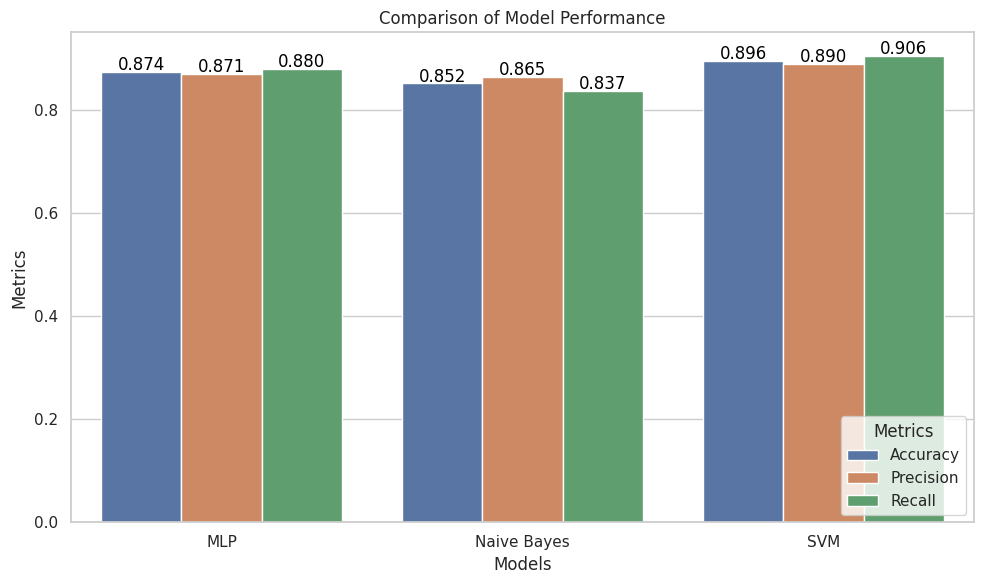

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names
models = ['MLP', 'Naive Bayes', 'SVM']

# Performance metrics (rounded to 3 decimals)
accuracy = [0.874, 0.852, 0.896]
precision = [0.871, 0.865, 0.890]
recall = [0.880, 0.837, 0.906]

# Create a DataFrame
data = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

# Set the style
sns.set(style='whitegrid')

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='value', hue='variable', data=pd.melt(data, ['Model']))

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Comparison of Model Performance')

# Display the legend
plt.legend(title='Metrics', loc='lower right')

# Move the index label to the bottom
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Add metric values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show()


Using as feature the embedding extracted from BERT

In [3]:
import numpy as np

In [40]:
import tensorflow as tf
import sklearn
from tqdm import tqdm


In [2]:
pip install transformers

In [7]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
# changing positive and negative into numeric values

def cat2num(value):
    if value=='positive':
        return 1
    else:
        return 0

df['sentiment']  =  df['sentiment'].apply(cat2num)
train = df[:45000]
test = df[45000:]

In [9]:
# Define a function to convert data into InputExamples for BERT model
def convert_data_to_examples(train, test, review, sentiment):
    # Convert the training data into InputExamples
    train_InputExamples = train.apply(lambda x: InputExample(guid=None,  # Globally unique ID for bookkeeping, unused in this case
                                                          text_a=x[review],  # The text of the review
                                                          label=x[sentiment]),  # The sentiment label
                                     axis=1)

    # Convert the testing data into InputExamples
    validation_InputExamples = test.apply(lambda x: InputExample(guid=None,  # Globally unique ID for bookkeeping, unused in this case
                                        text_a=x[review],  # The text of the review
                                        label=x[sentiment]),  # The sentiment label
                                        axis=1)

    return train_InputExamples, validation_InputExamples

# Call the function to convert training and testing data into InputExamples
train_InputExamples, validation_InputExamples = convert_data_to_examples(train,  test, 'review',  'sentiment')


In [10]:
# Define a function to convert examples to a TensorFlow dataset
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = []  # This list will hold InputFeatures to be converted later

    # Iterate through the examples
    for e in tqdm(examples):
        # Tokenize and encode the example using the provided tokenizer
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,  # Add 'CLS' and 'SEP'
            max_length=max_length,  # Truncate if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True,  # Pad to the right by default
            truncation=True
        )

        # Extract the input features
        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"], input_dict["token_type_ids"], input_dict['attention_mask'])

        # Create an InputFeatures object and append it to the features list
        features.append(InputFeatures(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label))

    # Define a generator function to yield features and labels
    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    # Convert the generator to a TensorFlow dataset
    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )

# Define column names for data
DATA_COLUMN = 'review'
LABEL_COLUMN = 'sentiment'


In [11]:
# Convert training examples to a TensorFlow dataset using the defined function
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)

# Shuffle the training data, create batches of size 32, and repeat it twice for two epochs
train_data = train_data.shuffle(100).batch(32).repeat(2)


  0%|          | 0/45000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 45000/45000 [06:10<00:00, 121.58it/s]


In [12]:
# Convert validation examples to a TensorFlow dataset using the defined function
validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)

# Create batches of size 32 for the validation data
validation_data = validation_data.batch(32)


100%|██████████| 5000/5000 [00:37<00:00, 134.57it/s]


In [ ]:
# Compile the model with optimizer, loss, and metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')]
)

# Train the model on the training data for 2 epochs, using the validation data for evaluation
model.fit(train_data, epochs=2, validation_data=validation_data)


Epoch 1/2
    434/Unknown - 20041s 46s/step - loss: 0.3583 - accuracy: 0.8353

hyperparameter 2 (didn't complete training because it's not converging, the learning rate value is high)


In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1, epsilon=1e-08, clipnorm=1.0),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

model.fit(train_data, epochs=1, validation_data=validation_data)

    126/Unknown - 6385s 50s/step - loss: 6.5637 - accuracy: 0.4985

KeyboardInterrupt: ignored

In [45]:
pred_sentences = ['Wow, blew my mind, what a movie by Marvel, animation and story is amazing']

In [46]:
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')   # we are tokenizing before sending into our trained model
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)       # axis=-1, this means that the index that will be returned by argmax will be taken from the *last* axis.
labels = ['Negative','Positive']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
for i in range(len(pred_sentences)):
    print(pred_sentences[i], ": ", labels[label[i]])

Wow, blew my mind, what a movie by Marvel, animation and story is amazing :  Positive
